# Data Analysis with Kings County House Sales Price 

## 1. Introduction

## 2. Imported Module List

## 3. Description   

In [1]:
try:
    f = open('kc_house_data.csv','r')
    print('file is found')
    
except IOError:
    print("File not found.")
    

file is found


In [35]:
#Data load
import pandas as pd
data = pd.read_csv('kc_house_data.csv')
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [36]:
#Drop unimprtant columns : waterfront, view,, year of renovated

data.drop(data.columns[[8,9,15]], axis=1, inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 18 columns):
id               21613 non-null int64
date             21613 non-null object
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
zipcode          21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: float64(5), int64(12), object(1)
memory usage: 3.0+ MB


In [37]:
# Maximum and minmum of date it is range from May 2th 2014 to May27 2015 about 1 year

data.date.min(), data.date.max()

('20140502T000000', '20150527T000000')

In [38]:
data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,3.409430,7.656873,1788.390691,291.509045,1971.005136,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.650743,1.175459,828.090978,442.575043,29.373411,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,3.000000,7.000000,1560.000000,0.000000,1975.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


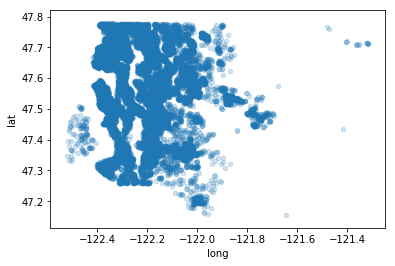

In [41]:
# Draw a scatter plot to find out where is the most expecsive area.

%matplotlib inline
import matplotlib.pyplot as plt
data.plot(kind="scatter", x="long", y="lat", alpha=0.2)
plt.savefig('scatter.png')

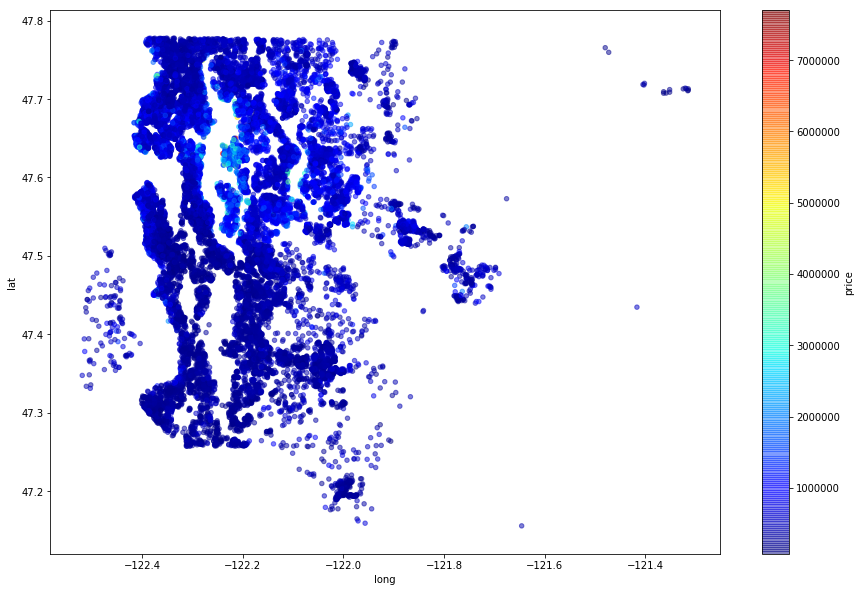

In [42]:
# The most expensive area is North West part of KIngs County.

data.plot(kind="scatter", x="long", y="lat", alpha=0.5, figsize=(15,10), c="price", cmap=plt.get_cmap("jet"), colorbar=True, sharex=False)
plt.savefig('coloredByPrice.png')

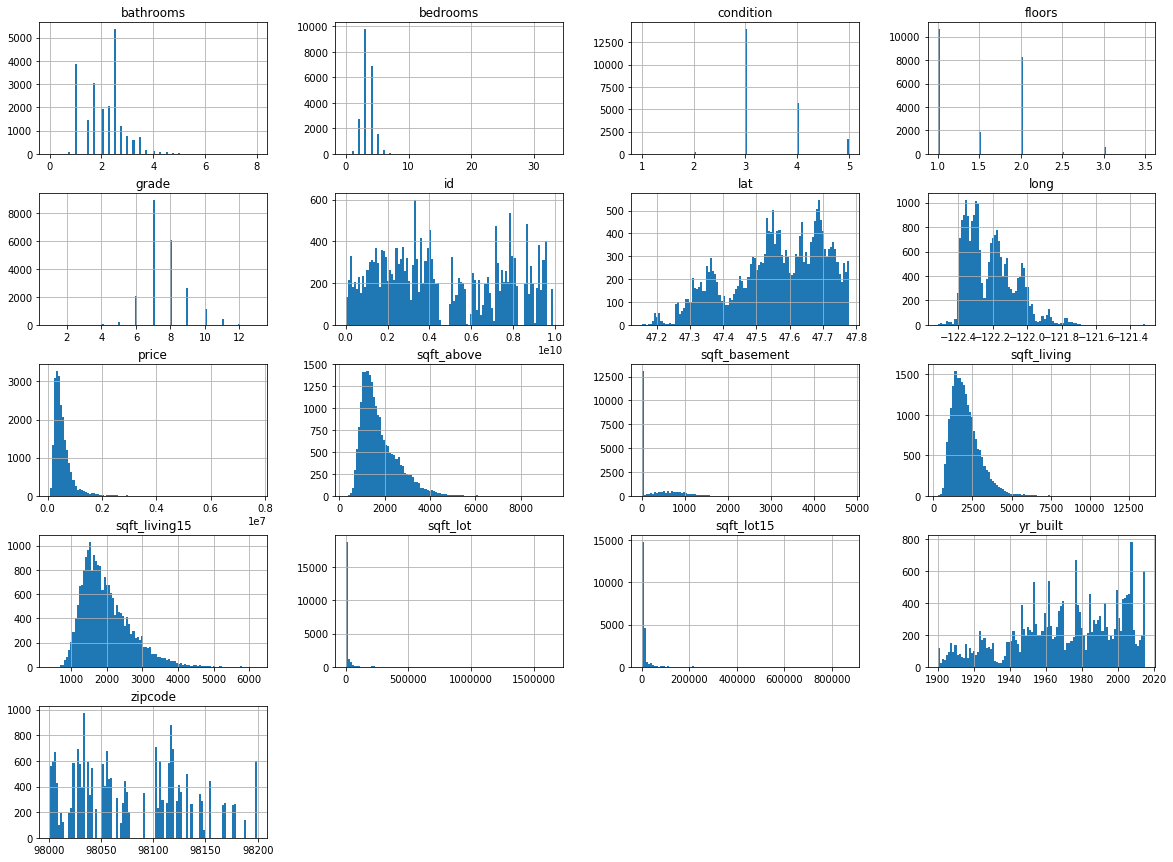

In [43]:
#Draw histogram for each factors.

data.hist(bins=100, figsize=(20,15))
plt.savefig("histogram")
plt.show()

In [44]:
# Find out wich factor is highly corelated with price.

correlation = data.corr()
correlation["price"].sort_values(ascending=False)

price            1.000000
sqft_living      0.702035
grade            0.667434
sqft_above       0.605567
sqft_living15    0.585379
bathrooms        0.525138
sqft_basement    0.323816
bedrooms         0.308350
lat              0.307003
floors           0.256794
sqft_lot         0.089661
sqft_lot15       0.082447
yr_built         0.054012
condition        0.036362
long             0.021626
id              -0.016762
zipcode         -0.053203
Name: price, dtype: float64

C:\Users\byunh\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  """


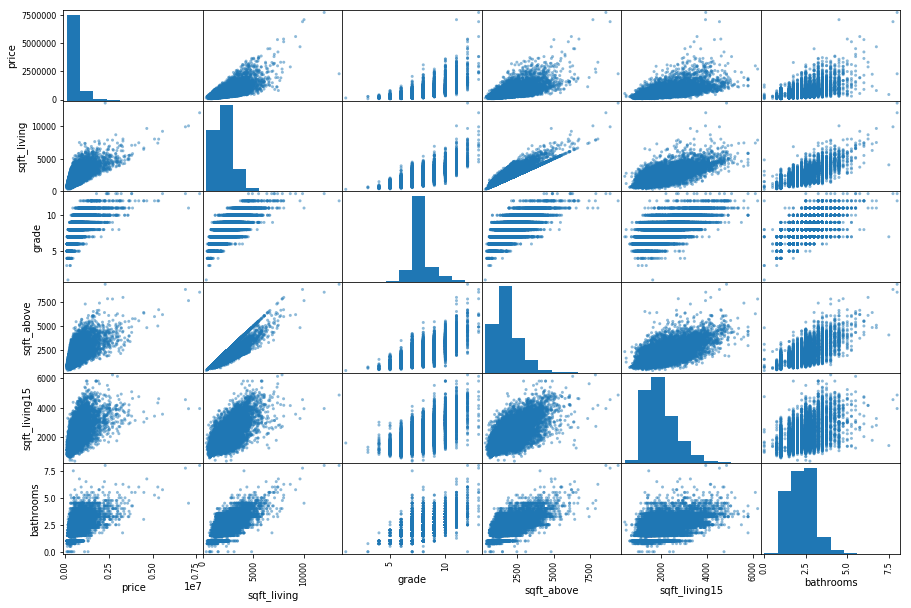

In [56]:
# Draw matrix to test relations show line.

from pandas.tools.plotting import scatter_matrix
factors = ["price", "sqft_living", "grade", "sqft_above","sqft_living15","bathrooms"]
scatter_matrix(data[factors], figsize=(15, 10))
plt.savefig('scatter_matrix.png')

In [46]:
#Built year is not significant factor but still important for people who searching a place.
#Check minium to maximun built year.

data.yr_built.min(), data.yr_built.max()

(1900, 2015)

In [47]:
#Make a dictionary for pair of id and  yr_built columns

import csv

with open('kc_house_data.csv', mode='r') as infile:
    reader = csv.reader(infile)
    with open('new_column.csv', mode='w') as outfile:
        writer = csv.writer(outfile)
        yearbuilt = {rows[0]:rows[14] for rows in reader}    

In [48]:
#If input id as key, get the year of built as value.

print(yearbuilt['1432701230'])

1959


In [49]:
# Check zipcode, if there is invalid zipcode. It should start with 9.

import re

count1 = 0
count2 = 0

zipcode_check = re.compile(r'(9\d)')

for i in data['zipcode']:
    
    if zipcode_check.search(str(i)):
        count1 += 1
    else:
        count2 += 1
        
print('The number of valid zipcode is %d' %count1)
print("The number of invalid zipcode is %d " %count2)
        


The number of valid zipcode is 21613
The number of invalid zipcode is 0 


In [50]:
#The number of zipcode is 70 

len(data['zipcode'].value_counts())

70

In [51]:
#Zipcode grouped by grade and density

dens = data.groupby('zipcode').count()['grade']
mean = data.groupby('zipcode').mean()['grade']
group = pd.concat([dens, mean], axis=1)
group['zipcode'] = group.index
group.columns = ['density', 'grade','zipcode']
group.describe()

,density,grade,zipcode
count,70.000000,70.000000,70.000000
mean,308.757143,7.664549,98077.300000
std,142.267296,0.611821,56.622408
min,50.000000,6.509294,98001.000000
25%,204.500000,7.261202,98029.250000
50%,282.500000,7.536861,98067.500000
75%,409.000000,8.016916,98117.750000
max,602.000000,9.560000,98199.000000


In [20]:
#Find out values by each group

group1 = group[group.grade < 7.536861]
group1.index

Int64Index([98001, 98002, 98010, 98014, 98019, 98022, 98024, 98030, 98031,
            98032, 98034, 98042, 98055, 98056, 98070, 98103, 98106, 98107,
            98108, 98115, 98117, 98118, 98125, 98126, 98133, 98136, 98144,
            98146, 98148, 98155, 98166, 98168, 98178, 98188, 98198],
           dtype='int64', name='zipcode')

In [21]:
temp= group[group.grade >= 7.536861]
group2 = temp[temp.density <282.500000]
group2.index

Int64Index([98003, 98005, 98007, 98011, 98039, 98040, 98045, 98072, 98077,
            98102, 98105, 98109, 98112, 98119, 98177],
           dtype='int64', name='zipcode')

In [23]:
group3 = temp[temp.density >=282.500000]
group3.index

Int64Index([98004, 98006, 98008, 98023, 98027, 98028, 98029, 98033, 98038,
            98052, 98053, 98058, 98059, 98065, 98074, 98075, 98092, 98116,
            98122, 98199],
           dtype='int64', name='zipcode')

In [24]:
#Make a function. if you put a zip code, you can get one of three groups.

def find_group(x):
    if x in group1.index:
        return 'low grade area'
    elif x in group2.index:
        return 'high grade and low density area'
    else:
        return 'high grade and high density area'
    
data['group'] = data.zipcode.apply(find_group)

In [25]:
find_group(98004)

'high grade and high density area'

In [26]:
find_group(98005)

'high grade and low density area'

In [27]:
find_group(98118)

'low grade area'

In [ ]:
#for index, row in data.iterrows():
#    print (row["zipcode"], row["group"])

In [ ]:
#Linear Regression and predict

#Except those high cofficient variables(sqft_living, grade,sqft_above , sqft_living15 ,bathrooms) 
#drop other variables for liniear regression
#also remove newly added'group' column

In [28]:
data.head()  

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15,group
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,3,7,1180,0,1955,98178,47.5112,-122.257,1340,5650,low grade area
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,3,7,2170,400,1951,98125,47.7210,-122.319,1690,7639,low grade area
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,3,6,770,0,1933,98028,47.7379,-122.233,2720,8062,high grade and high density area
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,5,7,1050,910,1965,98136,47.5208,-122.393,1360,5000,low grade area
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,3,8,1680,0,1987,98074,47.6168,-122.045,1800,7503,high grade and high density area


In [29]:
data.drop(data.columns[[0,1, 3, 6, 7, 8, 11, 12, 13, 14, 15, 17,18 ]], axis=1, inplace=True)
data.head()

,price,bathrooms,sqft_living,grade,sqft_above,sqft_living15
0,221900.0,1.00,1180,7,1180,1340
1,538000.0,2.25,2570,7,2170,1690
2,180000.0,1.00,770,6,770,2720
3,604000.0,3.00,1960,7,1050,1360
4,510000.0,2.00,1680,8,1680,1800


In [52]:
# linear regresstion with those five factors for price factor

X = data[['bathrooms', 'sqft_living', 'grade', 'sqft_above', 'sqft_living15']]
Y = data['price']

In [53]:
from sklearn.cross_validation import train_test_split

Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size=0.2, random_state=0)

from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(Xtrain, Ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [54]:
# Get R squared

predict= reg.predict(Xtest)
print(' R squared is %.4f' % reg.score(Xtest, Ytest))

 R squared is 0.5491


In [55]:
# Get Root mean squared error (RMSE)

import numpy as np
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(predict, Ytest)
rmse = np.sqrt(mse)
print('RMSE is %.4f' % rmse)

RMSE is 231575.4823


## 4. Conclusion 